In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [17]:
df= pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [18]:
df.shape

(10000, 14)

In [19]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [21]:
df.duplicated().sum()

0

In [22]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [23]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [24]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [25]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [26]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [27]:
df= pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True, dtype=int)

In [35]:
X= df.drop(columns=['Exited'])
y= df['Exited']

In [36]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [38]:
X_train.shape, y_test.shape

((8000, 11), (2000,))

In [39]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train_trans= scaler.fit_transform(X_train)
X_test_trans= scaler.transform(X_test)

In [76]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [77]:
model = Sequential()

model.add(Dense(11, activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [80]:
history = model.fit(X_train_trans, y_train,epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5019 - loss: 0.7182 - val_accuracy: 0.8006 - val_loss: 0.4938
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.4835 - val_accuracy: 0.8188 - val_loss: 0.4159
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8085 - loss: 0.4334 - val_accuracy: 0.8369 - val_loss: 0.3883
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8261 - loss: 0.3947 - val_accuracy: 0.8469 - val_loss: 0.3755
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8433 - loss: 0.3748 - val_accuracy: 0.8469 - val_loss: 0.3686
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8471 - loss: 0.3666 - val_accuracy: 0.8462 - val_loss: 0.3653
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8439 - loss: 0.3728 - val_accuracy: 0.8438 - val_loss: 0.3622
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8503 - loss: 0.3606 - val_accu

In [81]:
 model.layers[1].get_weights()

[array([[ 0.23489022,  0.5681345 ,  0.02861147,  0.11365303,  0.2908702 ,
         -0.18706515, -0.3593734 ,  0.13776177, -0.27879995, -0.45069447,
          0.7000751 ],
        [ 0.50979304, -0.43299982,  0.16390167,  0.13313952,  0.05202167,
          0.46042225, -0.54639655,  0.3711477 , -0.14900707, -0.139027  ,
          0.5903446 ],
        [-0.42772427, -0.6267031 ,  0.08750574,  0.37881967,  0.07956472,
         -0.08579582, -0.06324334,  0.75743943, -0.10614998, -0.18347184,
         -0.602122  ],
        [-0.04256519,  0.5632527 , -0.14877743,  0.29948303, -0.13888113,
          0.59108245,  0.5120796 ,  0.31760398,  0.6089659 ,  0.2494009 ,
          0.35116634],
        [ 0.14227083,  0.14494814, -0.11950205,  0.27667248,  0.33488026,
          0.19350947, -0.03457876,  0.49298057, -0.7343907 , -0.23202291,
          0.4238021 ],
        [-0.0538062 ,  0.0570341 ,  0.04667618,  0.13154736,  0.28538325,
          0.21829498, -0.9788226 , -0.42855614,  0.17089823,  0.2657989

In [82]:
y_log=model.predict(X_test_trans)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [83]:
y_pred= np.where(y_log > 0.5,1,0)

In [84]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.861

In [85]:
import matplotlib.pyplot as plt

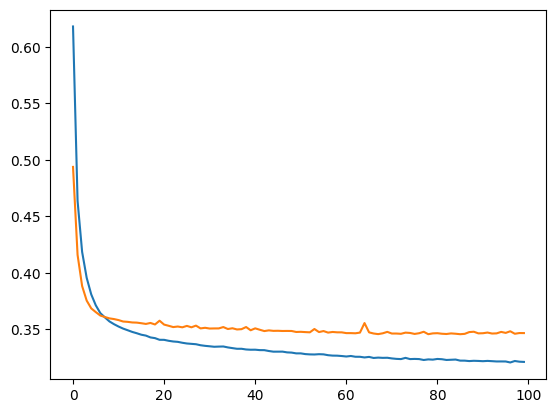

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

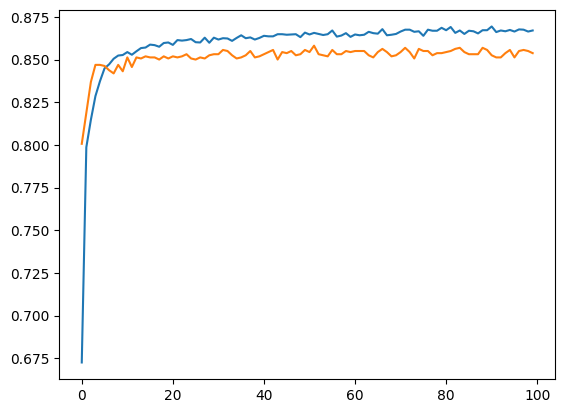

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])